In [6]:
import numpy as np
import matplotlib.pyplot as plt  # Optional for visualization
from scipy.stats import norm
from sklearn.neighbors import KernelDensity # Import the required library for k-NN

In [7]:
# Parameters for the Gaussian components
means = np.array([-3, 8])
std_devs = np.array([3, 1.75])

# Mixture weights
weights = [0.6, 0.4]

In [8]:
# Define a function for calculating the Kullback-Leibler (KL) divergence
def KL(p, q):
    # Add a small value (eps) to prevent logarithmic calculations at 0
    eps = 0.00001
    p = p + eps  # Adding eps to p
    q = q + eps  # Adding eps to q
    # Calculate the KL divergence using the formula sum(p * log(p / q))
    divergence = np.sum(p * np.log(p / q))
    # Return the calculated KL divergence
    return divergence

In [9]:
# Number of samples to generate
num_samples = 50

# Setting the random seed to ensure reproducibility
np.random.seed(123)

# Randomly choose components based on mixture weights
component_choices = np.random.choice([0, 1], size=num_samples, p=[weights[0], weights[1]])

# Initialize an array to store the generated samples
samples = np.zeros(num_samples)

# Generate samples from each component
for i in range(num_samples):
    if component_choices[i] == 0:
        samples[i] = np.random.normal(means[0], std_devs[0])
    else:
        samples[i] = np.random.normal(means[1], std_devs[1])

When h =  0.005 KL divergence is 36.941726512878205
When h =  0.01 KL divergence is 34.327976252296494
When h =  0.07 KL divergence is 12.317967940232508
When h =  0.2 KL divergence is 2.8030375003188714
When h =  0.5 KL divergence is 0.6609600420199346
When h =  1.0 KL divergence is 0.4832583449706487


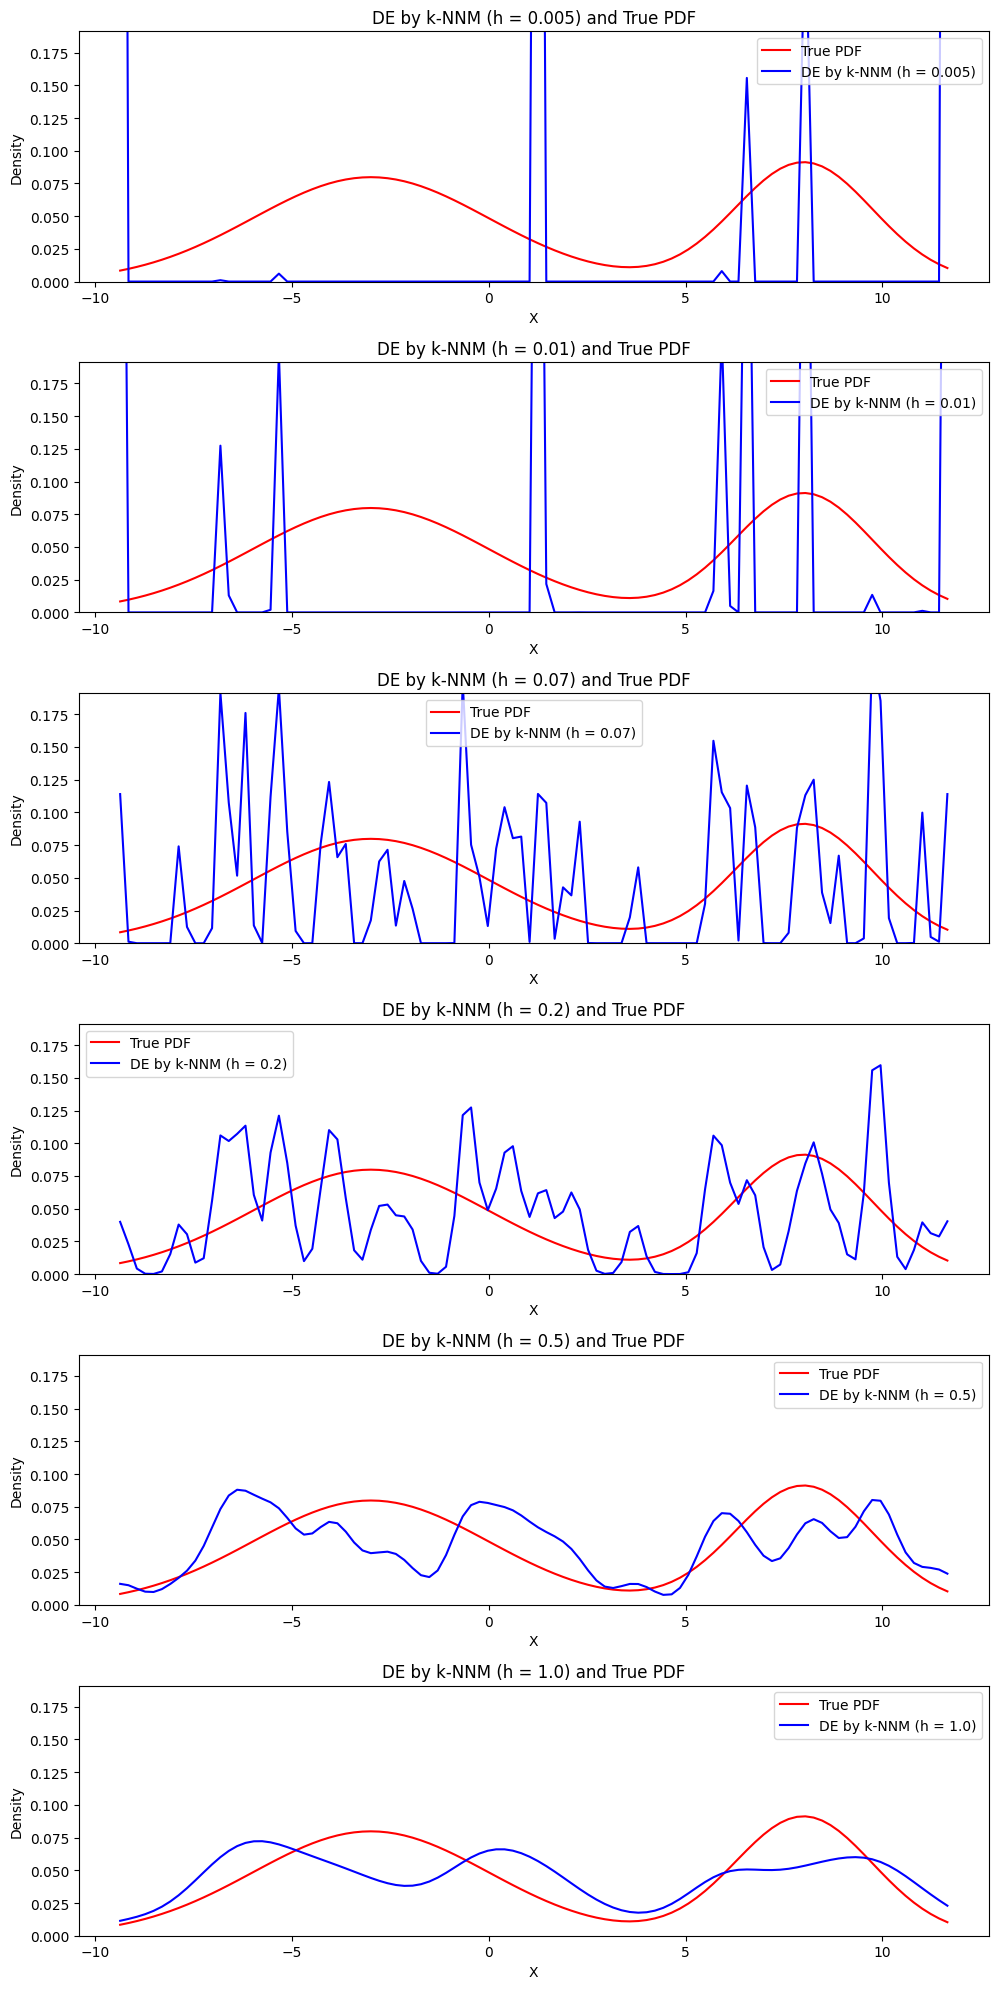

In [10]:
# List of Smoothing parameters for k-NN
h_list = [0.005, 0.01, 0.07, 0.2, 0.5, 1.0]

# Create a figure to hold the plots
plt.figure(figsize=(10, 20))

# Loop through each number of Smoothing parameters in the h_list
for i, num_h in enumerate(h_list):
    
    plt.subplot(len(h_list), 1, i + 1)  # Create subplots for each number of Smoothing parameters

    x = np.linspace(min(samples), max(samples), 100)  # Adjusted x range for better visualization
    # You can adjust bandwidth and kernel type
    # Reshape your data if it's 1D
    knn = KernelDensity(bandwidth=num_h, kernel='gaussian').fit(samples.reshape(-1, 1))
    # Evaluate the estimated density at these points
    knn = np.exp(knn.score_samples(x.reshape(-1, 1)))
    pdf = weights[0] * norm.pdf(x, means[0], std_devs[0]) + weights[1] * norm.pdf(x, means[1], std_devs[1])
    # Plot the PDF of the Gaussian mixture distribution
    plt.plot(x, pdf, 'r', label='True PDF')
    # Plot the estimated density as a blue line
    plt.plot(x, knn, 'b', label='DE by k-NNM (h = {})'.format(num_h))

    plt.xlabel('X')
    plt.ylabel('Density')
    plt.title('DE by k-NNM (h = {}) and True PDF'.format(num_h))
    plt.legend()
    plt.ylim(0.0, max(pdf) + 0.1)
    # Print KL divergence at each Smoothing parameter
    print("When h = ", num_h,"KL divergence is", KL(pdf, knn))

# Adjust layout and display the figure with all subplots
plt.tight_layout()
plt.show()